# Финальный проект модуля Python
#  «Анализ данных об оптовых продажах аудиотехники»

**В финальном проекте модуля Python вам предстоит поработать аналитиком данных в компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.** 

«Карпов Саунд» сотрудничает с крупными розничными сетями и специализированными магазинами аудиотехники в России. Клиенты компании регулярно оставляют заявки на закупку товаров в CRM системе, менеджеры связываются с клиентами, обсуждают детали, после чего заказы либо подтверждаются менеджерами, либо по разным причинам отменяются. 

В «Карпов Саунд» трепетно относятся к хранению информации о своих товарах, клиентах и заказах, однако в самый неподходящий момент хранилище данных компании оказалось временно недоступно из-за плановых работ по его оптимизации. Поэтому в рамках этого проекта все данные будут представлены не в самом удобном для анализа виде — в формате резервной выгрузки, разложенной по разным папкам на сервере компании.

Вам необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут руководству компании принять верные тактические решения.

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

Данные находятся в папке `data` из директории `shared` (`shared` -> `homeworks` -> `python_ds_miniprojects` -> `final_project`). Внутри папки `data` находятся 2 другие папки: `orders` и `products`.

В папке `orders` папки с датами, в которые сделаны записи. В этих папках — папки с именами менеджеров по продажам. Эти папки содержат файлы `orders.csv` и `order_status.csv` (в каждой папке по одной паре файлов). Пример структуры: `data` -> `orders` -> `2024-03-01` -> `Алексей Саксофонов` -> `orders.csv` и `order_status.csv`.

В папке `products` папки с категориями товаров. В этих папках файлы `products.csv` (в каждой папке по одному файлу). Пример структуры: `data` -> `products` -> `AV-процессор` -> `products.csv`.

Кроме того у вас есть файл `usd_rate.txt` с курсом доллара США на каждый день анализируемого периода (данные в формате `дата,курс,валюта`). Он потребуется в середине проекта.

В финальном проекте модуля вы можете пользоваться подсказками в ноутбуке (они менее подробные, чем были в предыдущих уроках), обращаться за помощью к экспертам в Discord и смотреть разборы в LMS (за просмотр разбора снимается половина баллов за задание).

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  

**Соберите датафреймы и сохраните их в соответствующие csv файлы: `df_orders.csv`, `df_order_status.csv` и `df_products.csv`. Отправьте файлы на проверку в LMS.**

In [109]:
import pandas as pd
import os

In [110]:
df_orders       = pd.DataFrame()
df_order_status = pd.DataFrame()
df_products     = pd.DataFrame()

paths = os.walk('data')
for path in paths:
    try:
        if len(path[2]) == 2:
            #df_order_status
            manager_orders_path = (path[0]+ '\\' + path[2][0])      
            manager_name = (path[0]+ '\\' + path[2][0]).split('\\')[3]
            date = (path[0]+ '\\' + path[2][0]).split('\\')[2]

            df_p_orders = pd.read_csv(manager_orders_path)
            df_p_orders['manager'] = manager_name
            df_p_orders['date'] = pd.to_datetime(date, format='%Y/%m/%d')
            df_p_orders = df_p_orders[['order_id', 'product_id', 'quantity', 'manager', 'date']]

            df_orders = pd.concat([df_orders, df_p_orders])

            #df_order_status
            manager_order_status_path = (path[0]+ '\\' + path[2][1])

            df_p_order_status = pd.read_csv(manager_order_status_path)
            df_p_order_status = df_p_order_status[['order_id', 'client_id', 'status']]

            df_order_status = pd.concat([df_order_status, df_p_order_status])
        if len(path[2])==1:
            #df_products
            products_path = (path[0]+ '\\' + path[2][0])
            category_name = products_path.split('\\')[2]
            
            df_p_products = pd.read_csv(products_path)
            df_p_products['category'] = category_name
            df_p_products = df_p_products[['id', 'name', 'price', 'category']]
            
            df_products = pd.concat([df_products, df_p_products])
    except error as e:
        print(e)

In [111]:
df_orders.to_csv('df_orders.csv', index=False)
df_order_status.to_csv('df_order_status.csv', index=False)
df_products.to_csv('df_products.csv', index=False)

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

## Шаг 3

Посчитайте количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

In [112]:
orders_by_day = df_orders.date.value_counts()
orders_by_day

2024-03-14    437
2024-03-13    339
2024-03-01    302
2024-03-29    241
2024-03-26    231
2024-03-15    225
2024-03-05    222
2024-03-20    222
2024-03-06    221
2024-03-27    203
2024-03-12    203
2024-03-07    201
2024-03-22    191
2024-03-11    185
2024-03-19    172
2024-03-18    159
2024-03-28    155
2024-03-21    152
2024-03-04    143
2024-03-25    129
2024-03-17     43
2024-03-23     42
2024-03-10     35
2024-03-24     33
2024-03-02     30
2024-03-16     26
2024-03-30     20
2024-03-09     18
2024-03-31     10
2024-03-03      8
2024-03-08      5
Name: date, dtype: int64

## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

In [113]:
df_orders['day'] = df_orders.date.dt.day_name()

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
plt.figure(figsize=[16,8], dpi=800)
sns.countplot(df_orders, x='day')

<AxesSubplot:xlabel='day', ylabel='count'>

## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

In [116]:
orders_by_day

2024-03-14    437
2024-03-13    339
2024-03-01    302
2024-03-29    241
2024-03-26    231
2024-03-15    225
2024-03-05    222
2024-03-20    222
2024-03-06    221
2024-03-27    203
2024-03-12    203
2024-03-07    201
2024-03-22    191
2024-03-11    185
2024-03-19    172
2024-03-18    159
2024-03-28    155
2024-03-21    152
2024-03-04    143
2024-03-25    129
2024-03-17     43
2024-03-23     42
2024-03-10     35
2024-03-24     33
2024-03-02     30
2024-03-16     26
2024-03-30     20
2024-03-09     18
2024-03-31     10
2024-03-03      8
2024-03-08      5
Name: date, dtype: int64

## Шаг 6

К вам пришел радостный руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах. Общий датафрейм назовите `orders_status`. Сохраните получившийся датафрейм в csv файл `orders_status.csv` (при сохранении используйте параметр `index=False`) и отправьте этот csv файл на проверку в LMS.**

In [117]:
orders_status = df_orders.merge(df_order_status, how='left', on='order_id')
orders_status

,order_id,product_id,quantity,manager,date,day,client_id,status
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,Friday,14,confirmed
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,Friday,14,confirmed
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,Friday,14,confirmed
3,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,Friday,14,confirmed
4,DUEU-27693834,1413,6,Алексей Саксофонов,2024-03-01,Friday,14,confirmed
...,...,...,...,...,...,...,...,...
4598,OYBY-86181208,1575,3,Анастасия Дудкина,2024-03-31,Sunday,11,confirmed
4599,OYBY-86181208,941,11,Анастасия Дудкина,2024-03-31,Sunday,11,confirmed
4600,OYBY-86181208,1335,22,Анастасия Дудкина,2024-03-31,Sunday,11,confirmed
4601,OYBY-86181208,296,22,Анастасия Дудкина,2024-03-31,Sunday,11,confirmed


In [118]:
orders_status_1 = orders_status.drop('day', axis=1)
orders_status_1.to_csv('orders_status.csv', index=False)

## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

In [119]:
orders_status.status.value_counts(normalize=True)

confirmed    0.88703
canceled     0.11297
Name: status, dtype: float64

## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

In [120]:
orders_status_by_day = orders_status\
    .groupby(['date', 'status'], as_index=False)\
    .agg({'order_id':'count'})\
    .pivot(index='date', columns='status', values='order_id')\
    .fillna(0)

orders_status_by_day

status,canceled,confirmed
date,,
2024-03-01,29.0,273.0
2024-03-02,0.0,30.0
2024-03-03,0.0,8.0
2024-03-04,0.0,143.0
2024-03-05,0.0,222.0
2024-03-06,12.0,209.0
2024-03-07,5.0,196.0
2024-03-08,0.0,5.0
2024-03-09,18.0,0.0


## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

<AxesSubplot:xlabel='date'>

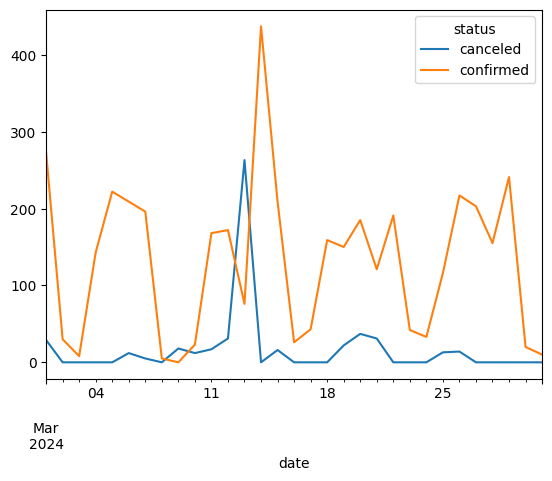

In [121]:
orders_status_by_day.plot()

## Шаг 10

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

Как можно определить, что заказ повторяет вчерашний? У заказов будут совпадать сразу несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках. Но номера заказов будут разными.

In [122]:
orders_by_day

2024-03-14    437
2024-03-13    339
2024-03-01    302
2024-03-29    241
2024-03-26    231
2024-03-15    225
2024-03-05    222
2024-03-20    222
2024-03-06    221
2024-03-27    203
2024-03-12    203
2024-03-07    201
2024-03-22    191
2024-03-11    185
2024-03-19    172
2024-03-18    159
2024-03-28    155
2024-03-21    152
2024-03-04    143
2024-03-25    129
2024-03-17     43
2024-03-23     42
2024-03-10     35
2024-03-24     33
2024-03-02     30
2024-03-16     26
2024-03-30     20
2024-03-09     18
2024-03-31     10
2024-03-03      8
2024-03-08      5
Name: date, dtype: int64

In [123]:
orders_status_by_day

status,canceled,confirmed
date,,
2024-03-01,29.0,273.0
2024-03-02,0.0,30.0
2024-03-03,0.0,8.0
2024-03-04,0.0,143.0
2024-03-05,0.0,222.0
2024-03-06,12.0,209.0
2024-03-07,5.0,196.0
2024-03-08,0.0,5.0
2024-03-09,18.0,0.0


### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но вот незадача - в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

In [124]:
df_usd_rate = pd.read_csv('usd_rate.txt', sep=',', names=['date', 'currency_rate', 'usa'])
df_usd_rate = df_usd_rate[['date', 'currency_rate']]
df_usd_rate['date'] = pd.to_datetime(df_usd_rate.date, format='%Y/%m/%d')

df_usd_rate.currency_rate.mean()

91.69706451612903

## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

In [125]:
df_products = df_products.rename(columns={'id':'product_id'})
df_products

,product_id,name,price,category
0,36,"Anthem, AVM 70",2580.03,AV-процессор
1,40,"Arcam, AV860",3400.64,AV-процессор
2,41,"Arcam, AVR30",3600.85,AV-процессор
3,205,"Denon, AVC-X8500H",3600.95,AV-процессор
4,206,"Denon, AVC-X6700H",2225.50,AV-процессор
...,...,...,...,...
72,1565,"Wharfedale, Diamond 220C",324.24,Центральный канал
73,1673,"Yamaha, NS-C210",86.80,Центральный канал
74,1674,"Yamaha, NS-C210BL",75.98,Центральный канал
75,1675,"Yamaha, NS-C444",165.50,Центральный канал


In [126]:
df_full = orders_status\
    .merge(df_products, on='product_id', how='left')\
    .merge(df_usd_rate, on='date', how='left')

df_full_confirmed = df_full.query('status == "confirmed"')
df_full_confirmed['revenue'] = df_full_confirmed['quantity']*df_full_confirmed['price']*df_full_confirmed['currency_rate']
df_full_confirmed.revenue.sum()

c:\users\elnur\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2038231821.564864

## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

In [127]:
df_full_confirmed.order_id.nunique()

309

In [128]:
2038231821.564864/309


6596219.487264932

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

In [129]:
df_full_confirmed.head()

,order_id,product_id,quantity,manager,date,day,client_id,status,name,price,category,currency_rate,revenue
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,Friday,14,confirmed,"Magnat, MC 400",430.56,Система караоке,90.8423,2.737914e+05
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,Friday,14,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники,90.8423,1.366341e+05
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,Friday,14,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,1.104715e+06
3,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,Friday,14,confirmed,"JBL, Arena 125C",217.75,Центральный канал,90.8423,1.978091e+05
4,DUEU-27693834,1413,6,Алексей Саксофонов,2024-03-01,Friday,14,confirmed,"Singtrix, Home Karaoke System",315.88,Система караоке,90.8423,1.721716e+05


In [130]:
revenue_count_by_day = df_full_confirmed\
    .groupby('date', as_index=False)\
    .agg({'order_id':'nunique', 'revenue':'sum'})\
    .rename(columns={'order_id':'cnt'})

revenue_count_by_day['mean_check'] = revenue_count_by_day['revenue']/revenue_count_by_day['cnt']
revenue_count_by_day

,date,cnt,revenue,mean_check
0,2024-03-01,20,1.554118e+08,7.770588e+06
1,2024-03-02,2,1.197167e+07,5.985834e+06
2,2024-03-03,1,2.548418e+06,2.548418e+06
3,2024-03-04,10,6.404993e+07,6.404993e+06
4,2024-03-05,18,8.952724e+07,4.973735e+06
5,2024-03-06,13,1.107687e+08,8.520669e+06
6,2024-03-07,13,9.102331e+07,7.001793e+06
7,2024-03-08,1,1.609147e+06,1.609147e+06
8,2024-03-10,2,8.929309e+06,4.464655e+06
9,2024-03-11,11,8.910847e+07,8.100770e+06


<AxesSubplot:title={'center':'Revenue'}>

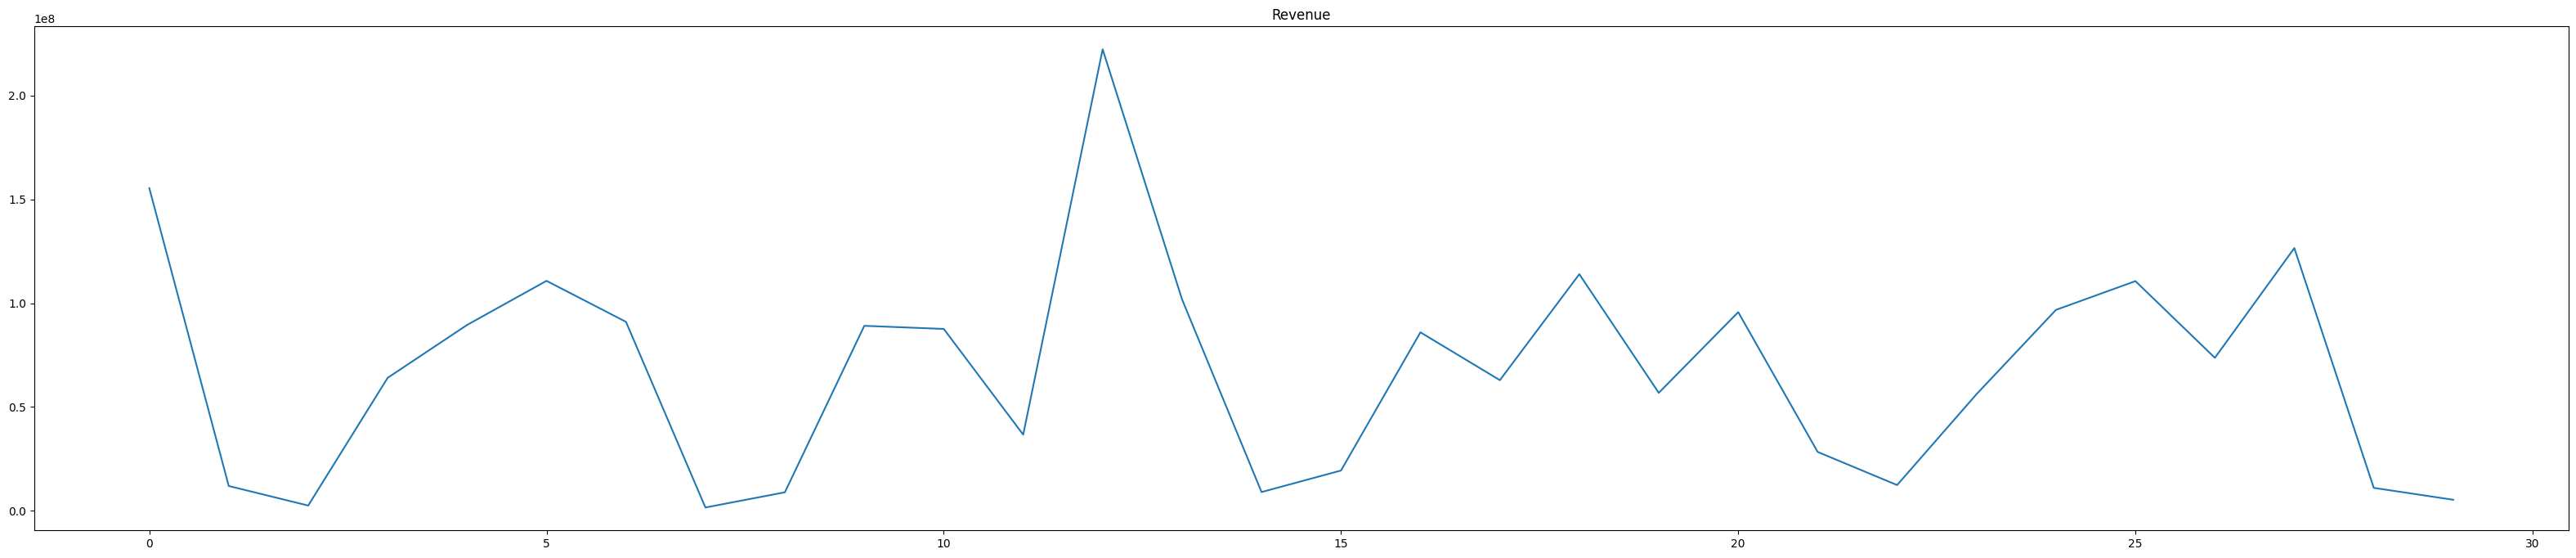

In [131]:
plt.figure(figsize=[40, 8])
plt.title('Revenue')
revenue_count_by_day.revenue.plot()

<AxesSubplot:title={'center':'Cnt'}>

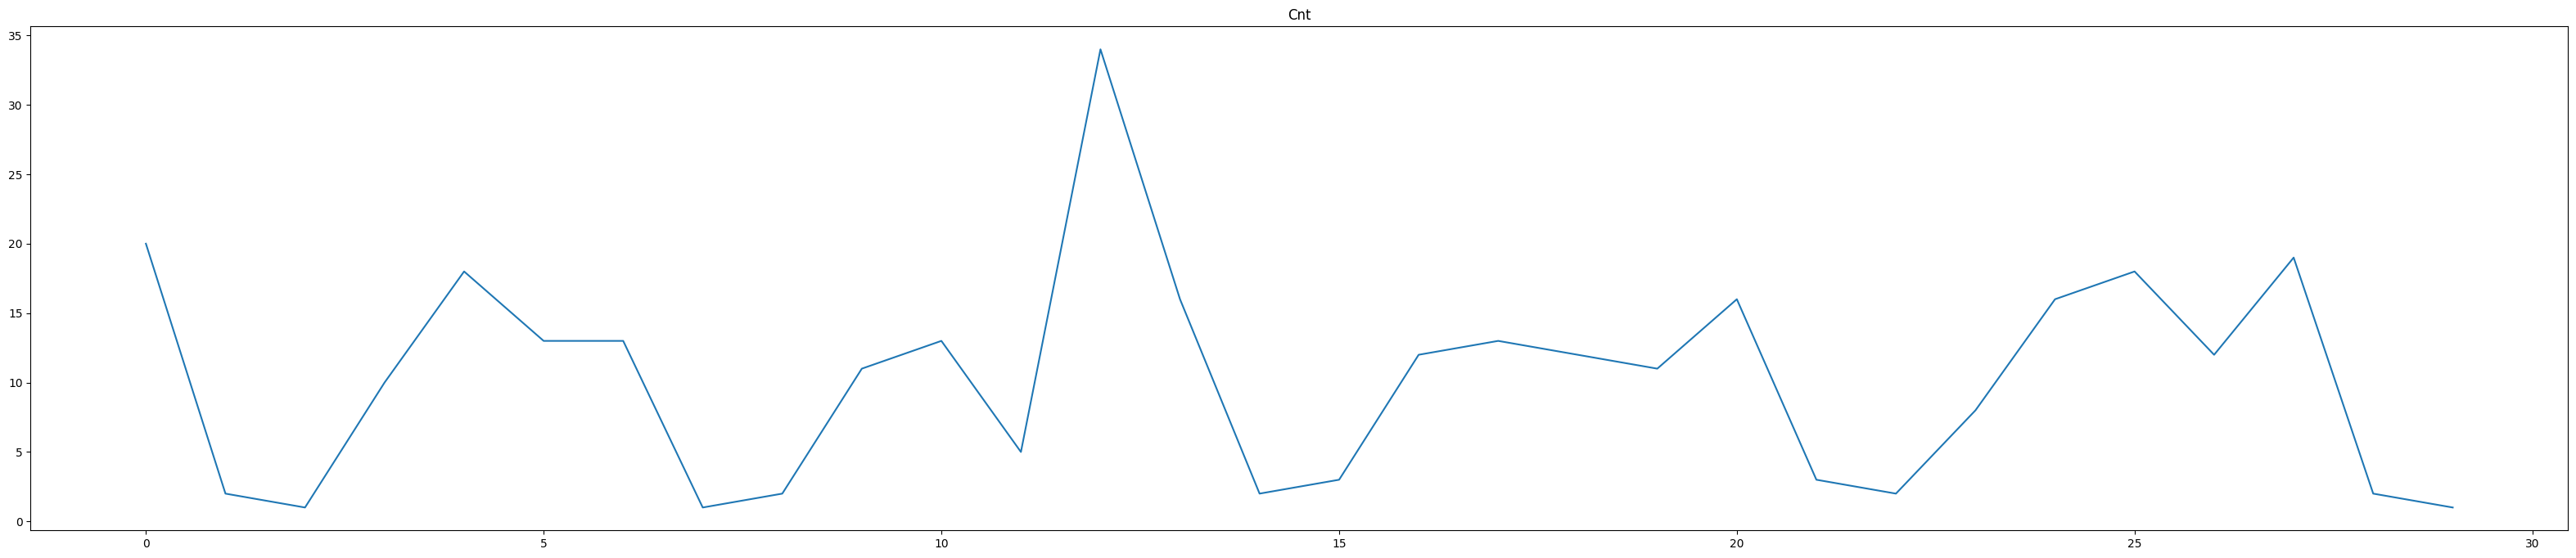

In [132]:
plt.figure(figsize=[40, 8])
plt.title('Cnt')
revenue_count_by_day.cnt.plot()

<AxesSubplot:title={'center':'Mean check'}>

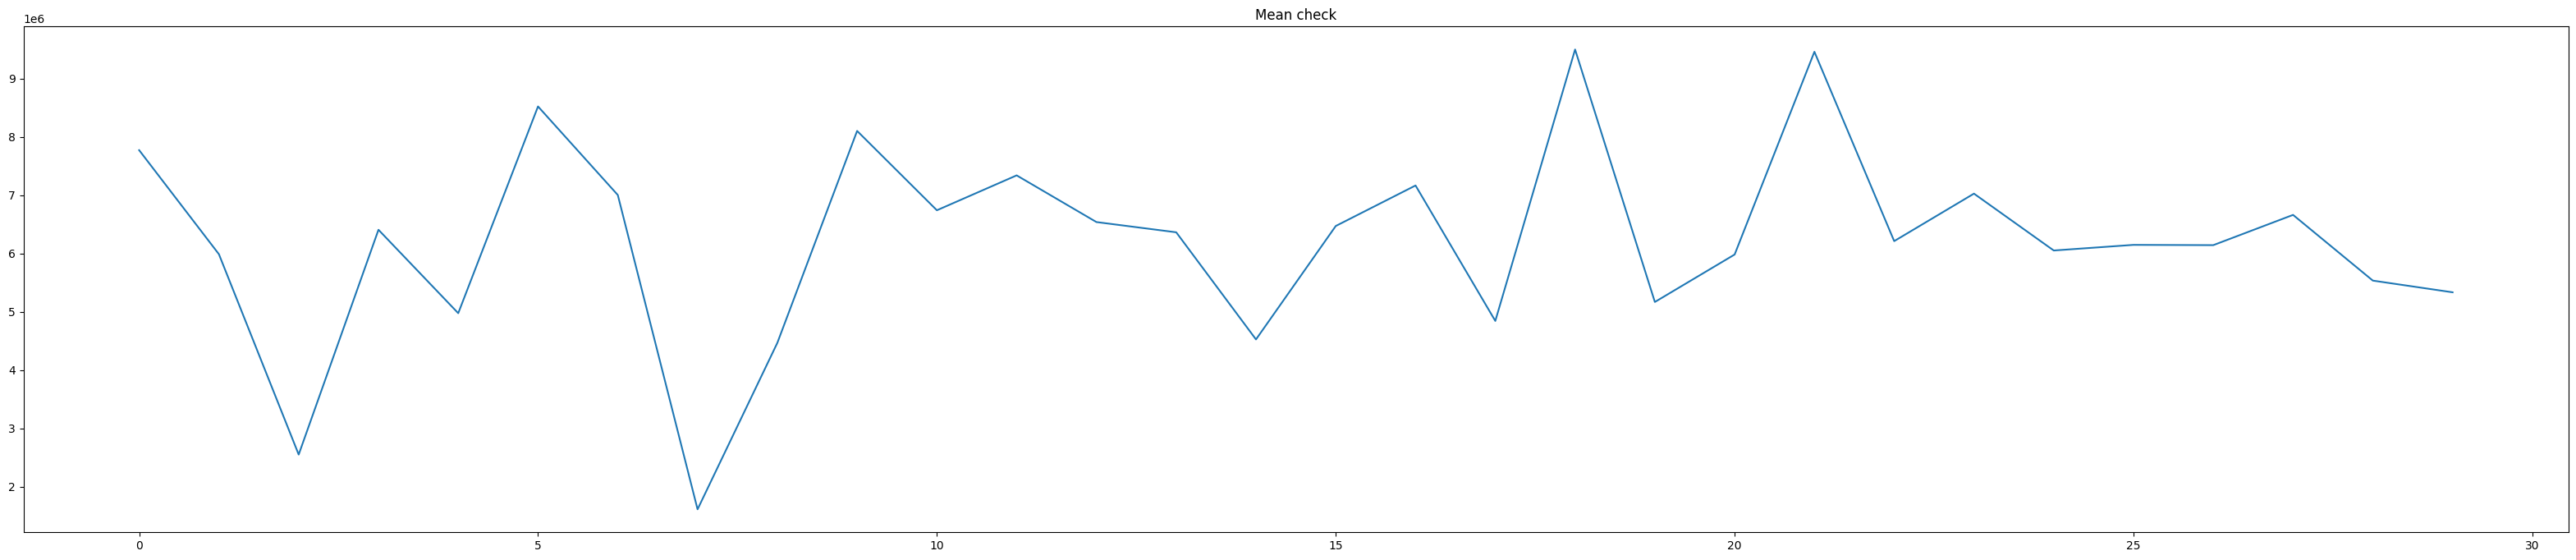

In [133]:
plt.figure(figsize=[40, 8])
plt.title('Mean check')
revenue_count_by_day.mean_check.plot()

### Проанализируем интерес клиентов к брендам

## Шаг 15

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

In [134]:
df_full['brand'] = df_full.name.apply(lambda x: x.split(', ')[0])
df_full

,order_id,product_id,quantity,manager,date,day,client_id,status,name,price,category,currency_rate,brand
0,DUEU-27693834,933,7,Алексей Саксофонов,2024-03-01,Friday,14,confirmed,"Magnat, MC 400",430.56,Система караоке,90.8423,Magnat
1,DUEU-27693834,1645,36,Алексей Саксофонов,2024-03-01,Friday,14,confirmed,"Yamaha, HPH-50B",41.78,Проводные наушники,90.8423,Yamaha
2,DUEU-27693834,1596,40,Алексей Саксофонов,2024-03-01,Friday,14,confirmed,"Yamaha, YH-E700A",304.02,Беспроводные наушники,90.8423,Yamaha
3,DUEU-27693834,648,10,Алексей Саксофонов,2024-03-01,Friday,14,confirmed,"JBL, Arena 125C",217.75,Центральный канал,90.8423,JBL
4,DUEU-27693834,1413,6,Алексей Саксофонов,2024-03-01,Friday,14,confirmed,"Singtrix, Home Karaoke System",315.88,Система караоке,90.8423,Singtrix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,OYBY-86181208,1575,3,Анастасия Дудкина,2024-03-31,Sunday,11,confirmed,"Yamaha, RX-A3080",1935.70,AV-ресивер,92.3660,Yamaha
4599,OYBY-86181208,941,11,Анастасия Дудкина,2024-03-31,Sunday,11,confirmed,"Magnat, Monitor Supreme Center 200",87.27,Центральный канал,92.3660,Magnat
4600,OYBY-86181208,1335,22,Анастасия Дудкина,2024-03-31,Sunday,11,confirmed,"Sennheiser, e 835",85.56,Динамический микрофон,92.3660,Sennheiser
4601,OYBY-86181208,296,22,Анастасия Дудкина,2024-03-31,Sunday,11,confirmed,"Edifier, K800",36.08,Наушники с микрофоном,92.3660,Edifier


In [135]:
df_full.brand.nunique()

121

## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

Дополнительно: проверьте, именно этот бренд встречается в большем количестве заказов, чем другие бренды? Или может его реже заказывают, но на более крупные суммы?

In [136]:
revenue_by_brand = df_full
revenue_by_brand['revenue'] = revenue_by_brand['quantity']*revenue_by_brand['currency_rate']*revenue_by_brand['price']

In [137]:
revenue_by_brand.groupby('brand', as_index=False)\
    .agg({'revenue':'sum'})\
    .sort_values('revenue', ascending=False)

,brand,revenue
46,JBL,3.080112e+08
43,Heco,2.632046e+08
53,Klipsch,2.205107e+08
120,Yamaha,1.798673e+08
49,KEF,1.619835e+08
...,...,...
88,SMSL,3.841799e+04
8,AudioSource,3.388167e+04
40,Fosi Audio,3.129419e+04
18,Bravo Audio,2.405086e+04


## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

In [138]:
ids = df_full_confirmed.drop_duplicates(subset='product_id').product_id.to_list()
ids

[933,
 1645,
 1596,
 648,
 1413,
 1472,
 202,
 835,
 474,
 1272,
 821,
 360,
 624,
 1625,
 778,
 446,
 538,
 1550,
 11,
 588,
 1461,
 496,
 465,
 501,
 607,
 509,
 665,
 563,
 784,
 807,
 787,
 24,
 451,
 218,
 484,
 780,
 420,
 58,
 283,
 508,
 470,
 1204,
 456,
 189,
 766,
 280,
 626,
 305,
 596,
 1226,
 605,
 1507,
 583,
 1594,
 758,
 1372,
 383,
 911,
 1411,
 379,
 1433,
 516,
 449,
 1238,
 1528,
 1527,
 1320,
 517,
 1663,
 606,
 429,
 646,
 930,
 1573,
 1409,
 530,
 814,
 352,
 1350,
 354,
 611,
 996,
 1392,
 1367,
 676,
 491,
 992,
 322,
 1286,
 1518,
 800,
 817,
 478,
 1352,
 644,
 312,
 1266,
 1251,
 1250,
 39,
 566,
 514,
 922,
 1651,
 138,
 671,
 975,
 1293,
 452,
 1100,
 1394,
 380,
 793,
 1585,
 217,
 870,
 1422,
 238,
 1054,
 799,
 1520,
 1257,
 559,
 481,
 1129,
 1208,
 1547,
 755,
 659,
 1192,
 623,
 894,
 1038,
 445,
 294,
 1138,
 382,
 536,
 1328,
 1140,
 1591,
 909,
 304,
 1201,
 619,
 1676,
 587,
 630,
 1337,
 1631,
 1242,
 585,
 1532,
 355,
 1253,
 756,
 303,
 381,


In [139]:
df_products['is_in_orders'] = df_products['product_id'].apply(lambda x: True if x in ids else False) 
df_products.is_in_orders.value_counts()

True     1180
False     497
Name: is_in_orders, dtype: int64

## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

In [140]:
df_products['brand'] = df_products.name.apply(lambda x: x.split(', ')[0])
df_products.head()

,product_id,name,price,category,is_in_orders,brand
0,36,"Anthem, AVM 70",2580.03,AV-процессор,False,Anthem
1,40,"Arcam, AV860",3400.64,AV-процессор,False,Arcam
2,41,"Arcam, AVR30",3600.85,AV-процессор,False,Arcam
3,205,"Denon, AVC-X8500H",3600.95,AV-процессор,False,Denon
4,206,"Denon, AVC-X6700H",2225.50,AV-процессор,False,Denon


In [141]:
brands_counts = df_products.groupby(['brand'], as_index=False).agg({'product_id':'count'})
brands_counts

,brand,product_id
0,AKG,11
1,ART,1
2,ASUS,3
3,Adam Audio,1
4,Amazon,4
...,...,...
141,Wharfedale,57
142,Xiaomi,4
143,YAQIN,1
144,Yamaha,106


In [142]:
full_brand_counts = df_products.groupby(['brand', 'is_in_orders'], as_index=False)\
    .agg({'product_id':'count'})\
    .merge(brands_counts, on='brand', how='left')
full_brand_counts.head()

,brand,is_in_orders,product_id_x,product_id_y
0,AKG,False,6,11
1,AKG,True,5,11
2,ART,True,1,1
3,ASUS,False,1,3
4,ASUS,True,2,3


In [143]:
full_brand_counts['res'] = full_brand_counts['product_id_x']/full_brand_counts['product_id_y']

In [144]:
full_brand_counts.query('product_id_y >= 15 and is_in_orders == False and res>0.5')

,brand,is_in_orders,product_id_x,product_id_y,res
44,Dali,False,49,67,0.731343
88,KEF,False,54,82,0.658537
115,Marantz,False,19,22,0.863636
141,Pioneer,False,70,103,0.679612


### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

In [145]:
res = df_full_confirmed\
    .groupby('manager', as_index=False)\
    .agg({'order_id':'nunique', 'revenue':'sum'})
res['order_id'] = res.order_id/res.order_id.sum()
res['revenue'] = res.revenue/res.revenue.sum()

In [153]:
res.sort_values(['order_id'], ascending=False)

,manager,order_id,revenue
4,Виктор Тромбонов,0.161812,0.156459
9,Маргарита Камертонова,0.155340,0.170436
8,Максим Барабанов,0.129450,0.117822
5,Владимир Ударников,0.100324,0.102288
6,Екатерина Тарелкина,0.090615,0.087408
0,Алексей Саксофонов,0.087379,0.095840
7,Ксения Балалайкина,0.087379,0.089176
10,Надежда Гармошкина,0.067961,0.066128
1,Анастасия Дудкина,0.064725,0.060567
2,Антон Скрипкин,0.022654,0.025268


In [ ]:
res.sort_values(['revenue'], ascending=False).head(-5).revenue.sum()

## Итоги

В финальном проекте модуля Python вы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке». Вы проделали отличную работу!

Но если считаете, что можете больше, продолжайте анализ имеющихся данных самостоятельно. Например, посмотрите, в какие дни недели оформляется в среднем больше заказов; составьте более полный отчет по продажам каждого менеджера (учтите отмененные заказы); определите наиболее и наименее популярные/прибыльные категории товаров и т.п. Данные полны инсайтов! Но эти задания не оцениваются и по ним не осуществляется поддержка экспертов. Зато вы можете сделать эту работу своим пет-проектом :)